# Airline On-Time Statistics and Delay Causes
## by Partha Goswami

## Investigation Overview

> The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly Air Travel Consumer Report, published about 30 days after the month's end, as well as in summary tables posted on this website (https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp). BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made available to the public at the time the Air Travel Consumer Report is released. (Data referred from - https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp).

> The investigation would try to find the prabable reasons and patterns of flight delays caused.


## Dataset Overview

> Our data frame contains flight delay information. Initially it had the following columns: 'year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct','security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay','security_delay', 'late_aircraft_delay'.

> Later we performed some transformations, renaming and also added/dropped some columns. Finally, we have the following columns with us, namely: 'year', 'month', 'carrier_name', 'arrival_flight_count', 'arrival_delay_in_min', 'air_carrier_related_delay_count','weather_related_delay_count', 'NAS_related_delay_count', 'security_related_delay_count', 'late_aircraft_related_delay_count', 'arrival_canceled_count', 'arrival_diverted_count', 'carrier_delay_in_min', 'weather_delay_in_min', 'nas_delay_in_min', 'security_delay_in_min', 'late_aircraft_delay_in_min', 'airport_name', 'city_name', 'state_name'.

> In total, we have 1769 observations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os
import datetime
import math
from math import radians, sin, cos, acos
import matplotlib.cm
#from __future__ import unicode_literals
#import joypy
no_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

In [2]:
# load in the dataset into a pandas dataframe
df_flights = pd.read_csv('flight_clean.csv')
df_flights.head(2)

,carrier_name,arrival_flight_count,arrival_delay_in_min,air_carrier_related_delay_count,weather_related_delay_count,NAS_related_delay_count,security_related_delay_count,late_aircraft_related_delay_count,arrival_canceled_count,arrival_diverted_count,carrier_delay_in_min,weather_delay_in_min,nas_delay_in_min,security_delay_in_min,late_aircraft_delay_in_min,airport_name,city_name,state_name
0,Endeavor Air Inc.,42,7,1,0,0,0,5,0,0,164,30,10,0,398,Lehigh Valley International,Allentown/Bethlehem/Easton,PA
1,Endeavor Air Inc.,104,18,6,0,2,0,8,0,2,491,6,238,0,916,Alexandria International,Alexandria,LA


## No. of Flights vs Arrival Delays

> Mostly, positive co-relation is seen between number of flights and airline operates and amount of flight delays it causes. In certain cases, American airlines have caused huge delays owing to enormous number of flights operated. However, its clearly indicated that, under quite high flight counts, skywest and southwest were able to keep the arrival delays at minimum.

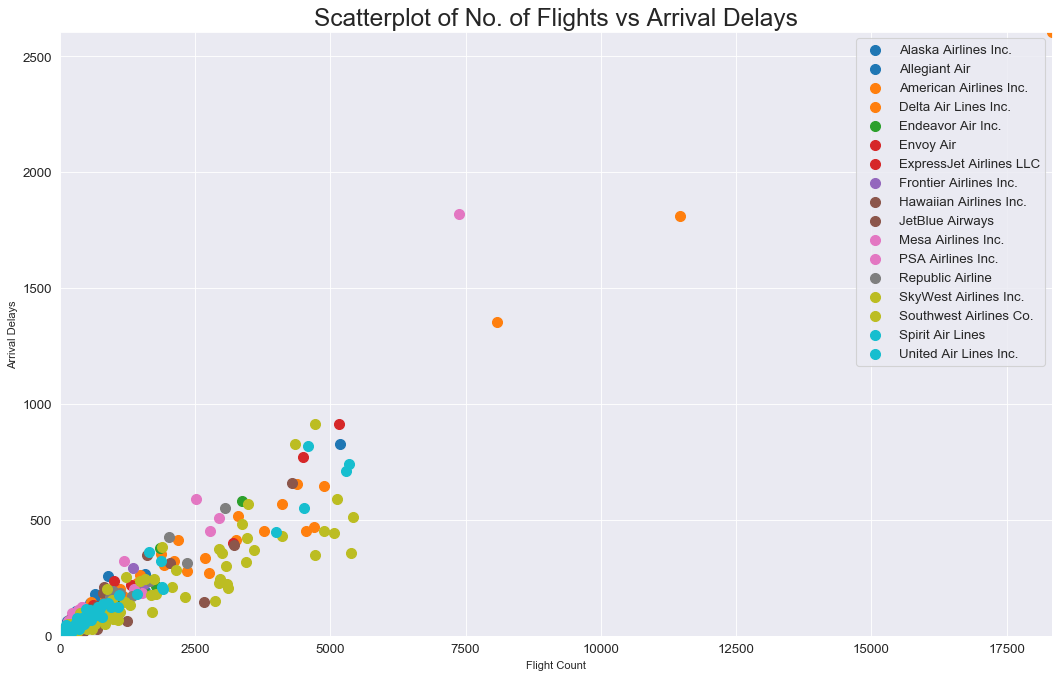

In [3]:
categories = np.unique(df_flights['carrier_name'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'arrival_delay_in_min', 
                data=df_flights.loc[df_flights.carrier_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 2605),
              xlabel='Flight Count', ylabel='Arrival Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Arrival Delays", fontsize=22)
plt.legend(fontsize=12)    
plt.show() 

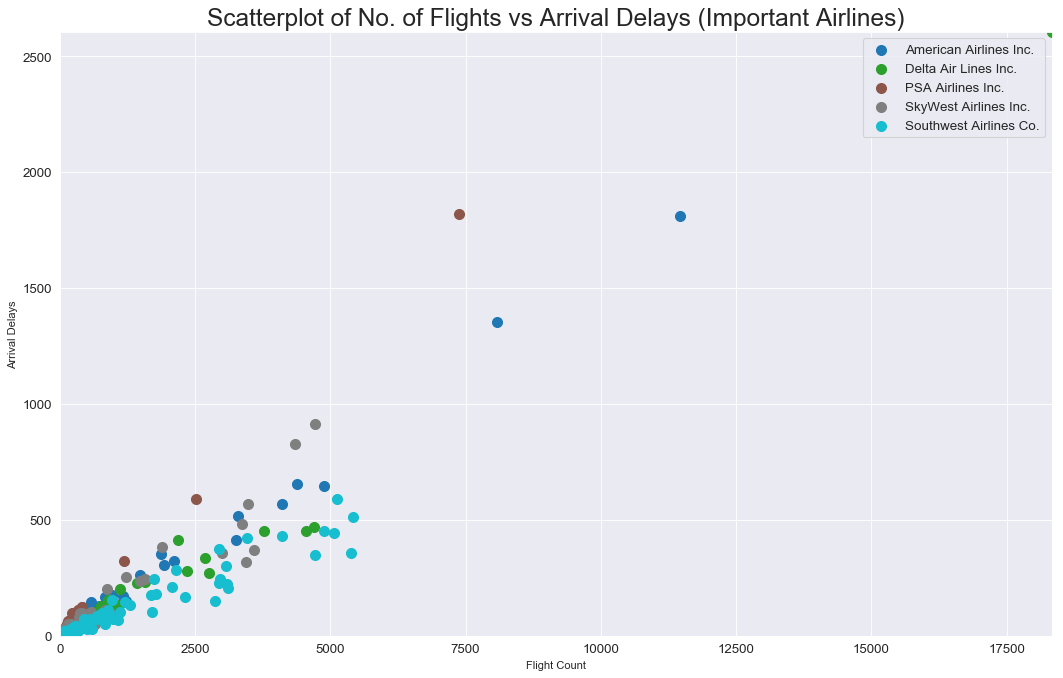

In [7]:
categories = ['American Airlines Inc.',
       'Delta Air Lines Inc.', 'PSA Airlines Inc.', 'SkyWest Airlines Inc.',
       'Southwest Airlines Co.']
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'arrival_delay_in_min', 
                data=df_flights.loc[df_flights.carrier_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 2605),
              xlabel='Flight Count', ylabel='Arrival Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Arrival Delays (Important Airlines)", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

## Arrival Flight Count vs Carrier Related Delay, for all airlines

> While we plotted the number of flights operated vs the carrier related delays, a not so positive corelation found. Later we narrowed down our plotting by selecting the key operators, as per the first graph. Southwest is clearly minimized the carrier related delays, while skywest delays are quite, all over the place.

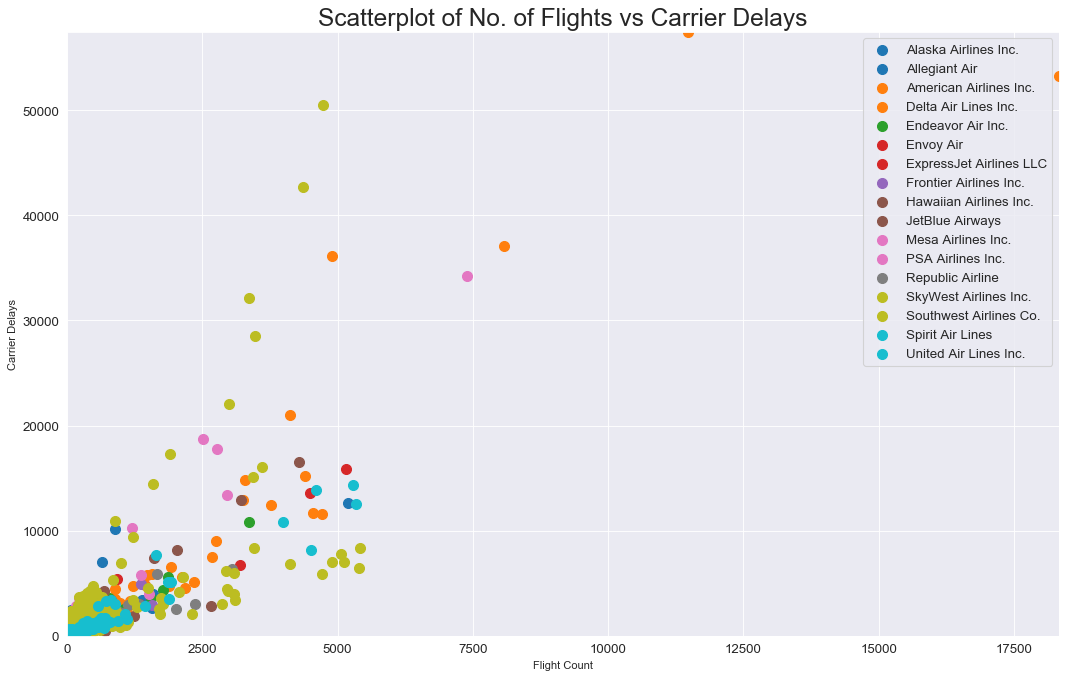

In [4]:
categories = np.unique(df_flights['carrier_name'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'carrier_delay_in_min', 
                data=df_flights.loc[df_flights.carrier_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 57477),
              xlabel='Flight Count', ylabel='Carrier Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Carrier Delays", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

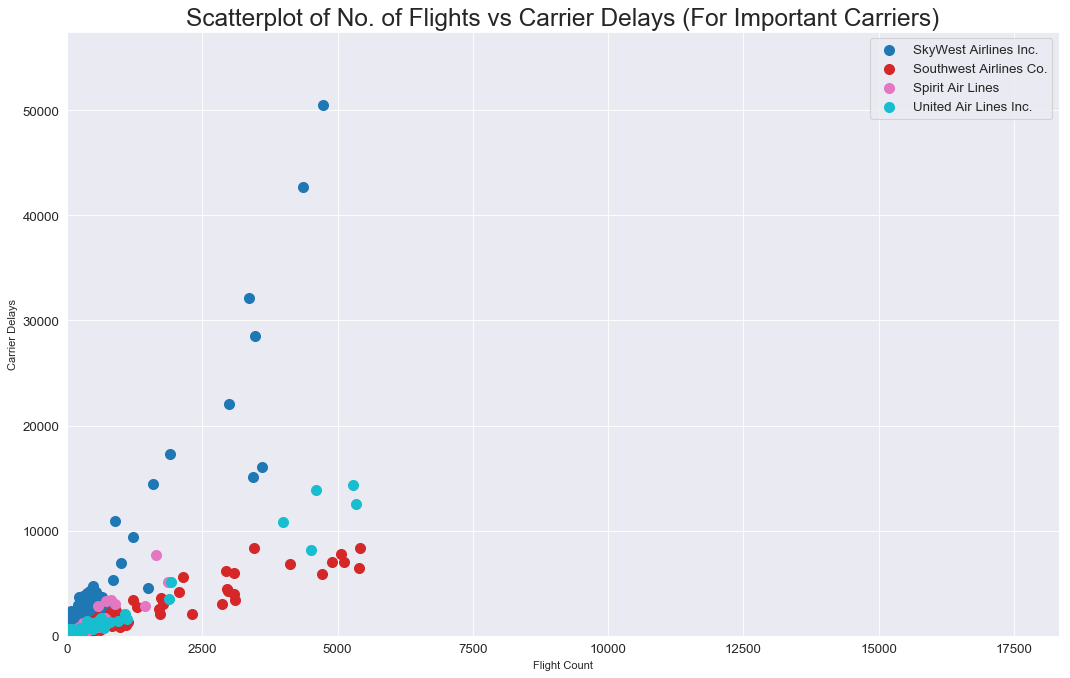

In [9]:
categories = ['SkyWest Airlines Inc.',
       'Southwest Airlines Co.', 'Spirit Air Lines',
       'United Air Lines Inc.']
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'carrier_delay_in_min', 
                data=df_flights.loc[df_flights.carrier_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 57477),
              xlabel='Flight Count', ylabel='Carrier Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Carrier Delays (For Important Carriers)", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

## Airport wise Flight Count vs Delay

> Under major airports handling most amount of incoming flights, McCarran, Dallas Love Field, Seattle and Atlanta airports are handling the arrival delays the most (in one case, seattle also caused huge arrival delay), while Charlotte Douglas need to pay attention of arrival delays. On the other hand, we are seeing, quite frequent arrival delays for Chicago O'Hare, while operating medium to high flights.

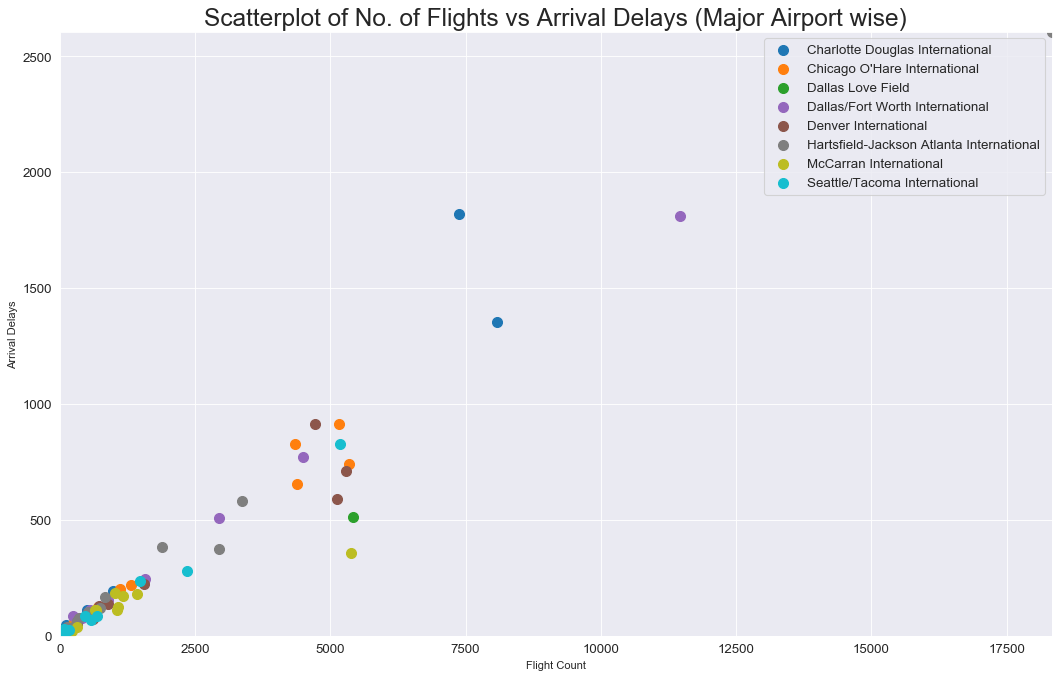

In [10]:
categories = ['Charlotte Douglas International', "Chicago O'Hare International",
       'Dallas Love Field', 'Dallas/Fort Worth International',
       'Denver International', 'Hartsfield-Jackson Atlanta International',
       'McCarran International', 'Seattle/Tacoma International']
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'arrival_delay_in_min', 
                data=df_flights.loc[df_flights.airport_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 2605),
              xlabel='Flight Count', ylabel='Arrival Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Arrival Delays (Major Airport wise)", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

## Major Flights & States, in terms of frequency

> So, even when southwest has performed best in terms of arrival delay, we should note that, it only operated in one of the seven coldest states in the US, during the month of feb. We would say, delta is the stand-out performer, while operating in the coldest of the states, while PSA comes second.

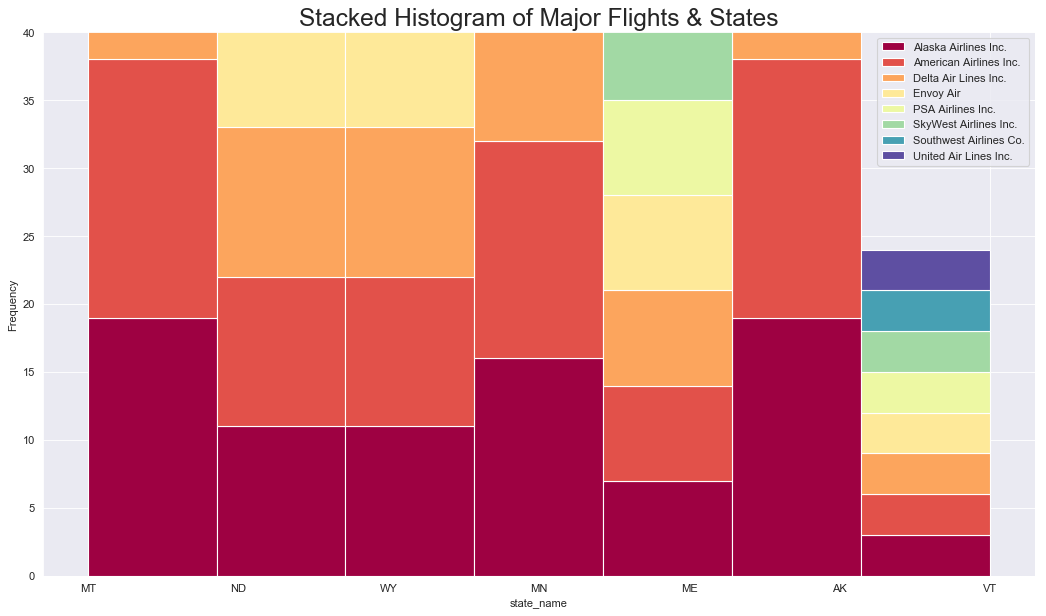

In [11]:
df_flights_filtered_interm = df_flights[df_flights['carrier_name'].isin(['Alaska Airlines Inc.', 'American Airlines Inc.',
       'Delta Air Lines Inc.', 'Envoy Air', 'PSA Airlines Inc.',
       'SkyWest Airlines Inc.', 'Southwest Airlines Co.',
       'United Air Lines Inc.'])]

df_flights_filtered = df_flights_filtered_interm[df_flights_filtered_interm['state_name'].isin(['MT', 'VT', 'WY', 'MN', 
                                                                                               'ME', 'ND', 'AK'])]

x_var = 'state_name'
groupby_var = 'carrier_name'
df_agg = df_flights_filtered.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df_flights_filtered[x_var].values.tolist() for i, df in df_agg]


plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df_flights_filtered[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(df_flights_filtered[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of Major Flights & States", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
#plt.xticks(labels=np.unique(df_flights_filtered[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

## NAS Delay Characteristics

> States like Georgia, Illionois, Massachusetts and new jersey caused enormous NAS related delays

<Figure size 160x100 with 0 Axes>

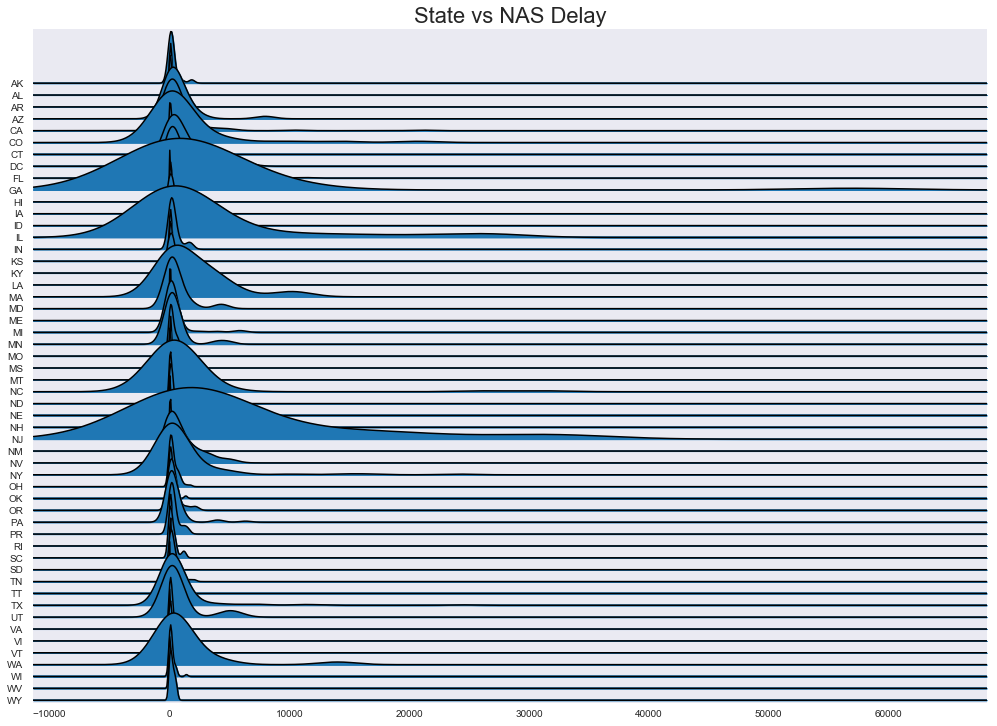

In [13]:
#!pip install joypy
import joypy
plt.figure(figsize=(16,10), dpi= 10)
fig, axes = joypy.joyplot(df_flights, column=['nas_delay_in_min'], 
                          by="state_name", ylim='own', figsize=(14,10))

# Decoration
plt.title('State vs NAS Delay', fontsize=22)
plt.show();

## Security delays for Major Airports

> Charlotte Douglas, Chicago O'Hare & Dallas Fort Worth had security related delays in the past. So, probably some security hindrances might have happened in those airports. So, it might be better to modernize/automate secury in those airports, thus ensuring lesser delays in future, for huge number of passengers.

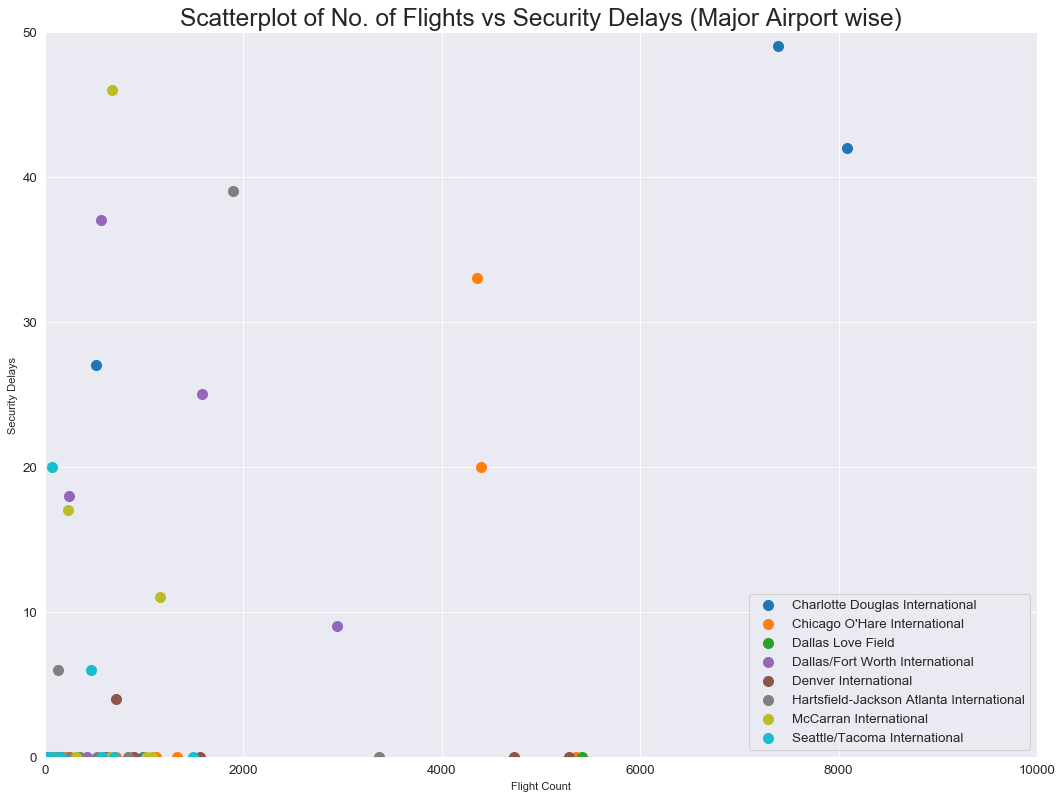

In [14]:
categories = ['Charlotte Douglas International', "Chicago O'Hare International",
       'Dallas Love Field', 'Dallas/Fort Worth International',
       'Denver International', 'Hartsfield-Jackson Atlanta International',
       'McCarran International', 'Seattle/Tacoma International']
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'security_delay_in_min', 
                data=df_flights.loc[df_flights.airport_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 10000), ylim=(0, 50),
              xlabel='Flight Count', ylabel='Security Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Security Delays (Major Airport wise)", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle